In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

***
### Read Data File (GoogleCloud)

In [2]:
cols = list(pd.read_csv("net_aigenerated_data_google.csv", nrows=1))
print(cols)

net_aigenerated_data_google = pd.read_csv('/projectnb/ds549/projects/AImpower/googlecloud-evals/net_aigenerated_data_google.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])


['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'GoogleCloud', 'WER', 'Stutterance_Count', 'NA_Count', 'NA_Cleaned_Count', 'WER_Binned', 'rouge1-precision', 'rouge1-recall', 'rouge1-f1', 'rouge2-precision', 'rouge2-recall', 'rouge2-f1', 'rougel-precision', 'rougel-recall', 'rougel-f1', 'Cleaned_Transcript', 'GroundTruth_Transcript']


In [3]:
net_aigenerated_data_google = net_aigenerated_data_google.assign(Duration=net_aigenerated_data_google['End_time']-net_aigenerated_data_google['Start_time'])
net_aigenerated_data_google = net_aigenerated_data_google.assign(Freq_Duration=net_aigenerated_data_google["Stutterance_Count"]/net_aigenerated_data_google["Duration"])
net_aigenerated_data_google = net_aigenerated_data_google.assign(Freq_CharCount=net_aigenerated_data_google["Stutterance_Count"]/net_aigenerated_data_google["GroundTruth_Transcript"].str.len())


In [4]:
net_aigenerated_data_google

,Filename,Start_time,End_time,GoogleCloud,WER,Stutterance_Count,NA_Count,NA_Cleaned_Count,WER_Binned,rouge1-precision,...,rouge2-recall,rouge2-f1,rougel-precision,rougel-recall,rougel-f1,Cleaned_Transcript,GroundTruth_Transcript,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出来就比较多需要时间哦然后那个识别的它的不就是它等你一会了那个话还没有说完还没有说出来的...,0.237113,1.0,1359,0,0.24,0.810811,...,0.459016,0.504504,0.810345,0.671429,0.734375,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,我说出来就比较的需要时间，哦，然后那个嗯/i识别的它的就是它等你一会儿，你那个话还没有说完，...,28.110000,0.035575,0.010101
1,D0001_A,790.130000,796.580000,电视剧叫我说的话,0.300000,1.0,1359,0,0.30,0.800000,...,0.333333,0.400000,0.800000,0.571429,0.666667,电视剧有，我说的话。,电视剧有，我/r说的话。,6.450000,0.155039,0.083333
2,D0001_A,1562.083518,1586.220000,这部剧是不怎么评判是不怎么好的评论区说拿了好惨的那个就那么情况但是就是一直输给男主角,0.421875,10.0,1359,0,0.42,0.818182,...,0.350000,0.444444,0.833333,0.476190,0.606061,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,这/b部剧是不怎么，评分是不怎么好的，呃/i就因为呃/i评/r/b论区的那[那]些人，他们都...,24.136482,0.414311,0.117647
3,D0001_A,2016.780000,2035.673559,很精准的讯飞语音还是讯飞出手救救我记得他是叫讯飞和之前就是他,0.368421,7.0,1359,0,0.37,0.705882,...,0.321429,0.382979,0.727273,0.516129,0.603774,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,很[很/b]精准，对，呃/i讯飞语音还是讯飞助手来着，就[就]我记得它是叫讯/r飞，我之前就...,18.893559,0.370497,0.129630
4,D0001_A,1682.670000,1709.110000,一个那个是叫啥来着我忘了就是出现了然后呢他他就算了一把剑里然后就叫板那个拿那个给打杀了就是可...,0.352941,8.0,1359,0,0.35,0.750000,...,0.318182,0.345679,0.692308,0.551020,0.613636,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,一个那个是嗯/i叫啥来着，我忘了，就是出现了另/r/b一个人，然后呢他[他]就射/p了一把剑...,26.440000,0.302572,0.093023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,单曲循环歌曲这样而已,0.090909,0.0,1359,0,0.09,1.000000,...,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲这样而已。,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,杨幂的电影,0.166667,0.0,1359,0,0.17,1.000000,...,0.666667,0.800000,1.000000,0.750000,0.857143,杨幂的电影。,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,你好米亚今天的油价怎么样,0.333333,0.0,1359,0,0.33,0.500000,...,0.000000,0.000000,0.500000,0.333333,0.400000,你好，米雅，今天柴油价怎么样。,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,单曲循环歌曲琉璃光之歌,0.083333,0.0,1359,0,0.08,1.000000,...,0.800000,0.888889,1.000000,0.833333,0.909091,单曲循环歌曲琉璃光之歌。,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


In [5]:
## SAVING

net_aigenerated_data_google.to_csv('net_aigenerated_data_google_performance_stu.csv', sep=',')

# net_aigenerated_data_google

## Visualization (GoogleCloud)

### Frequency setup: stuttering count/second

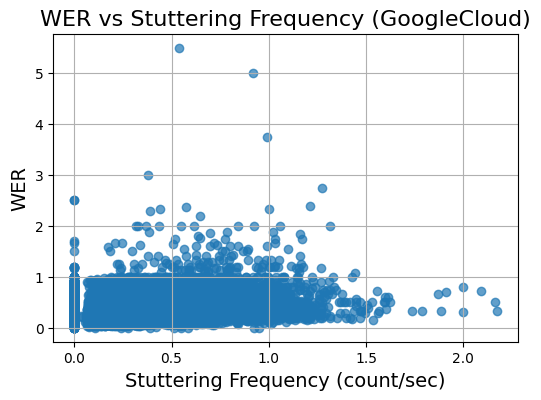

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/sec)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [7]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_Duration'], net_aigenerated_data_google.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 0.0
rho = 0.21363683474154918


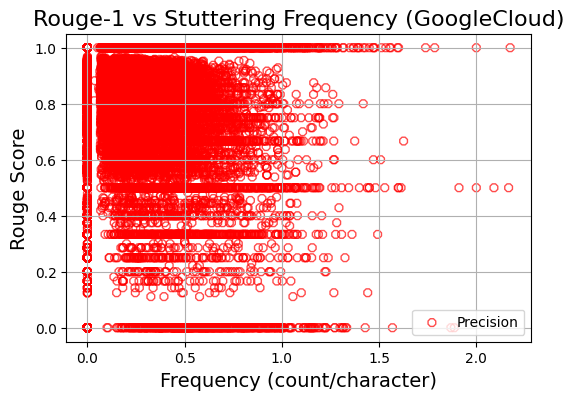

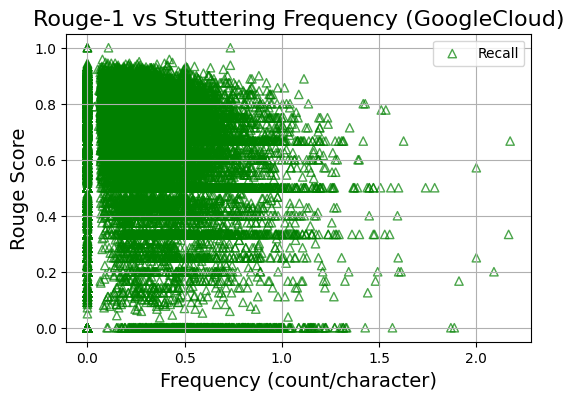

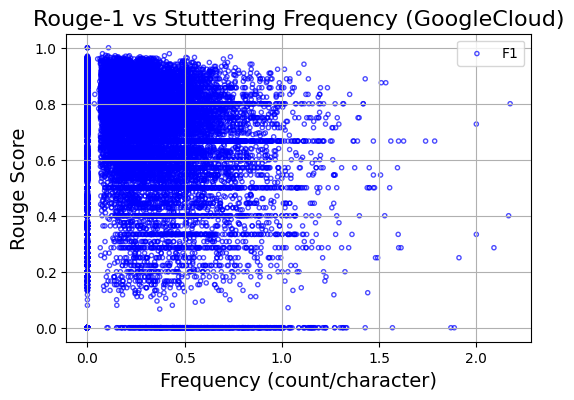

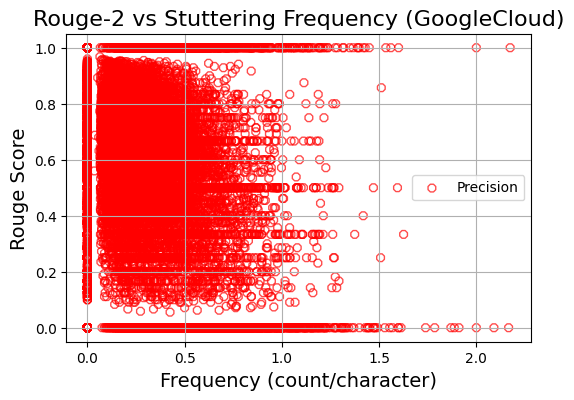

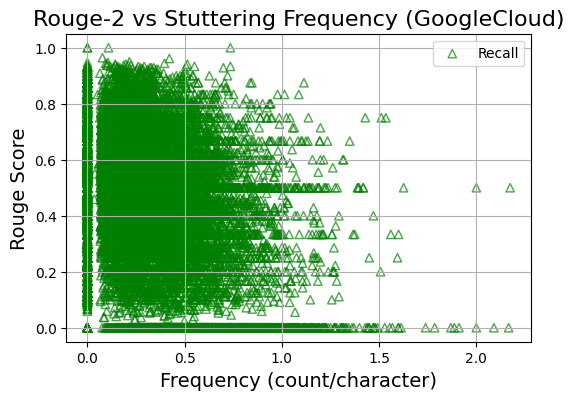

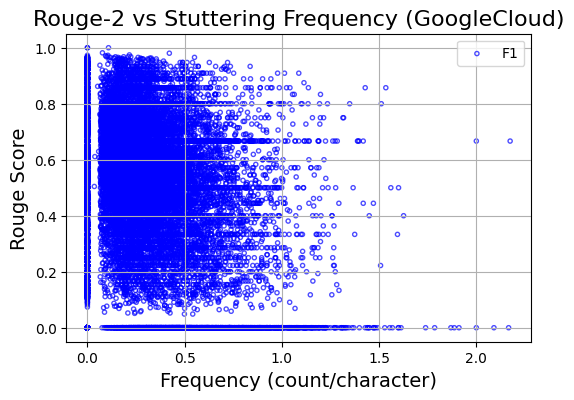

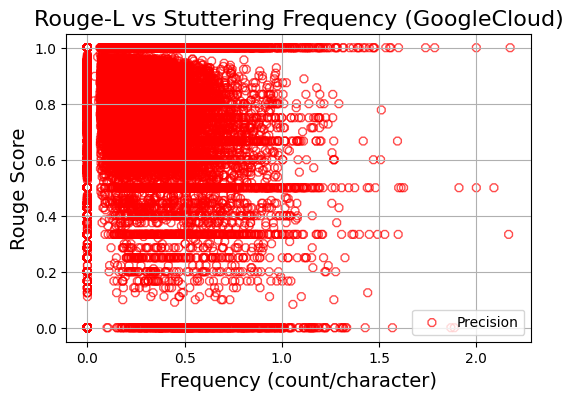

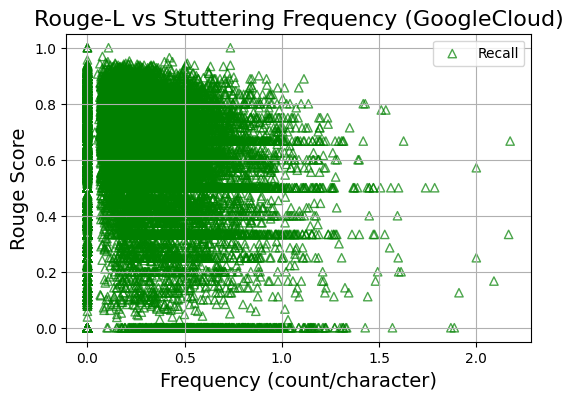

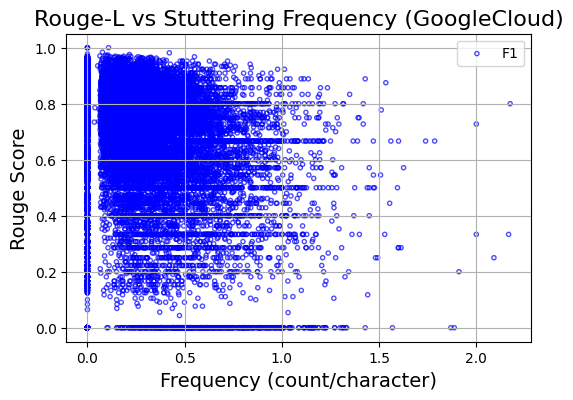

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_Duration"], 
    net_aigenerated_data_google["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [9]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_Duration'], net_aigenerated_data_google.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_Duration'], net_aigenerated_data_google.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_Duration'], net_aigenerated_data_google.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 5.1924886735780854e-64
rho [stuttering count & rouge-1 f1] = -0.08898999103547622
p-value [stuttering count & rouge-2 f1] = 3.9177194250449084e-98
rho [stuttering count & rouge-2 f1] = -0.11064287788194957
p-value [stuttering count & rouge-L f1] = 1.6685310240724044e-141
rho [stuttering count & rouge-L f1] = -0.13309349824482739


### Frequency Setup: Stuttering Count/Character

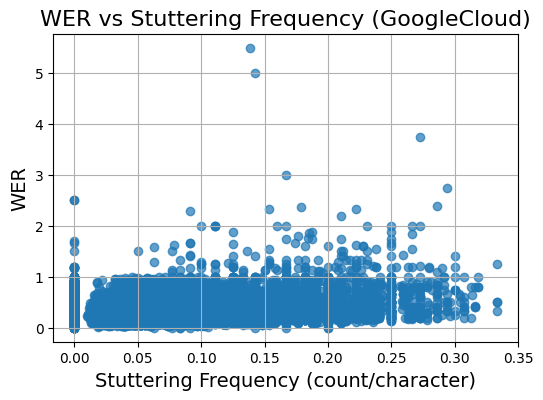

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/character)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [11]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_CharCount'], net_aigenerated_data_google.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 0.0
rho = 0.2079216610121778


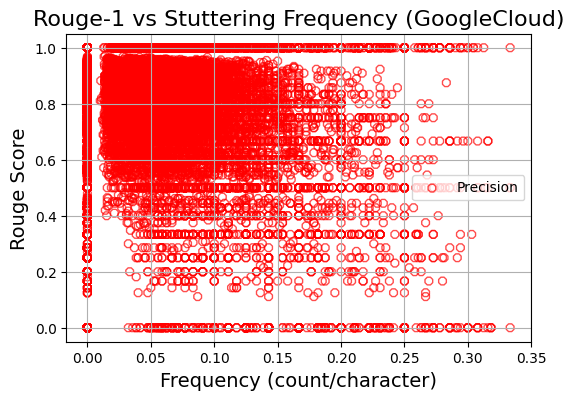

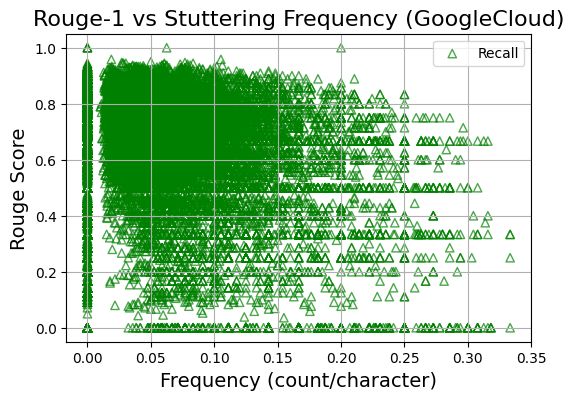

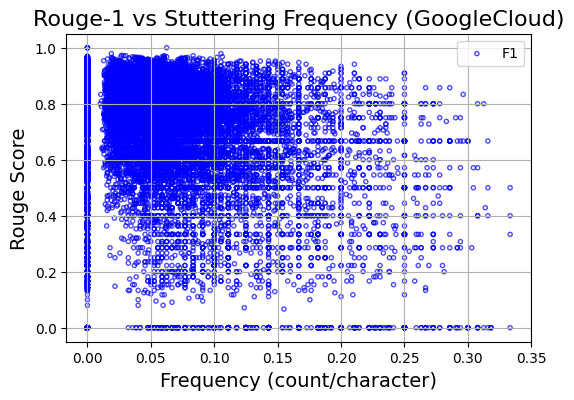

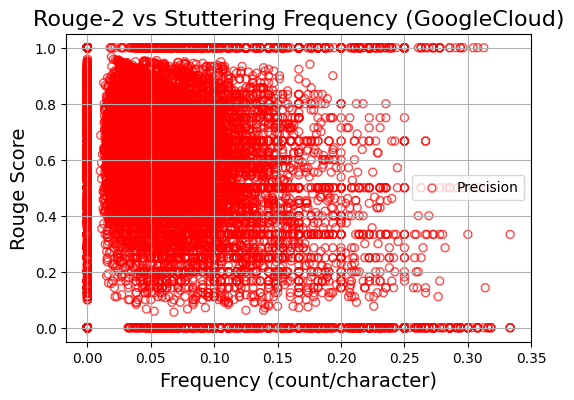

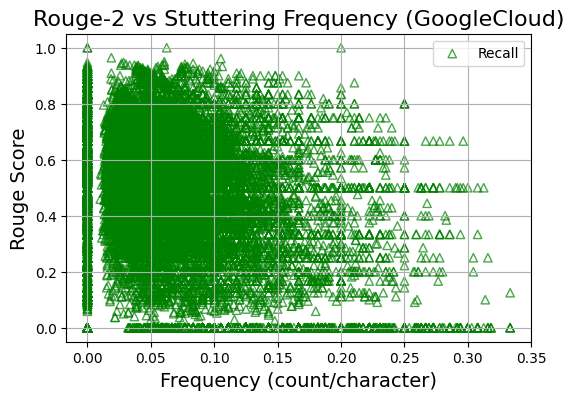

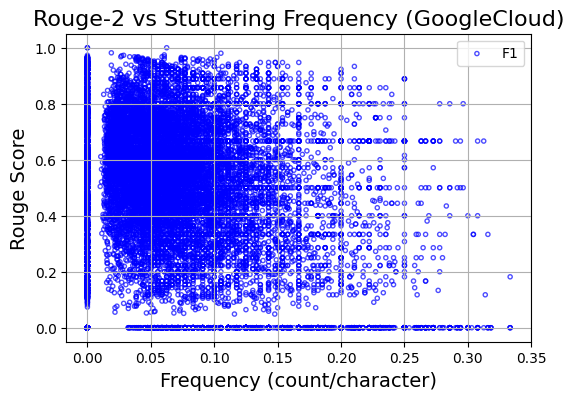

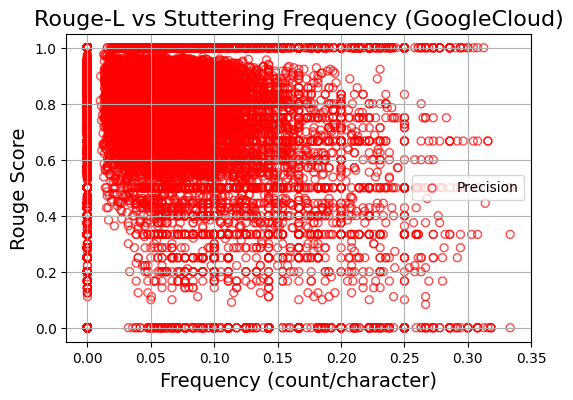

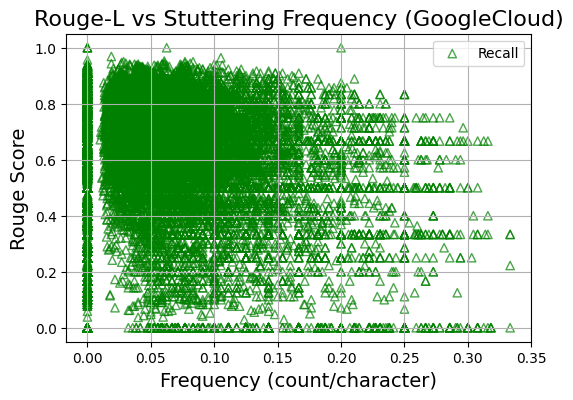

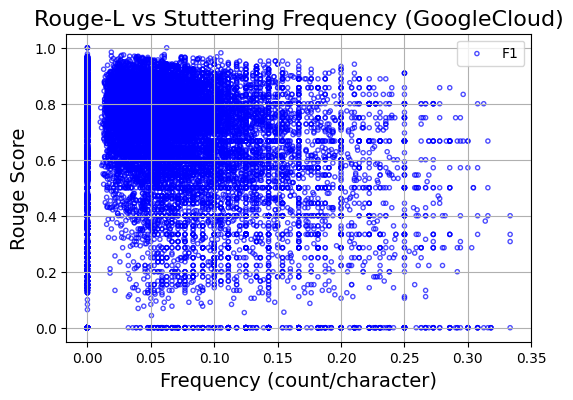

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_google["Freq_CharCount"], 
    net_aigenerated_data_google["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (GoogleCloud)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [13]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_CharCount'], net_aigenerated_data_google.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_CharCount'], net_aigenerated_data_google.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_google.dropna()['Freq_CharCount'], net_aigenerated_data_google.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 2.5100260316545623e-66
rho [stuttering count & rouge-1 f1] = -0.09062550215605734
p-value [stuttering count & rouge-2 f1] = 5.150590481677624e-99
rho [stuttering count & rouge-2 f1] = -0.11114532744427956
p-value [stuttering count & rouge-L f1] = 5.871155228889495e-140
rho [stuttering count & rouge-L f1] = -0.13236025629872994
